## import libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data=pd.read_csv(r'C:\Users\elfik\Desktop\Airbnb Listing EDA\listings.csv')

In [145]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [146]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [147]:
df=data[["id","name","host_id","neighbourhood",'latitude','longitude','room_type','minimum_nights','number_of_reviews',
         "reviews_per_month","calculated_host_listings_count",'availability_365','price']]

In [148]:
df.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,"Amsterdam, North Holland, Netherlands",52.40164,4.95106,Private room,3,303,2.30,2,272,$61.00
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,"Amsterdam, North Holland, Netherlands",52.38855,4.88521,Entire home/apt,3,78,0.64,1,16,$327.00
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,"Amsterdam, North Holland, Netherlands",52.37824,4.86826,Private room,2,341,2.73,3,29,$109.00
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,"Amsterdam, North Holland, Netherlands",52.34091,4.84802,Entire home/apt,3,10,0.11,1,0,$290.00
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,"Amsterdam, Noord-Holland, Netherlands",52.37641,4.88303,Private room,1,699,6.62,2,196,$150.00


## prepare and preprocessing data

In [149]:
print (df.info())
print ("-----------------------------------------------------------------")
print (df.describe())
print ("-----------------------------------------------------------------")
print (df.isnull().sum())
print ("-----------------------------------------------------------------")
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8386 non-null   int64  
 1   name                            8386 non-null   object 
 2   host_id                         8386 non-null   int64  
 3   neighbourhood                   5208 non-null   object 
 4   latitude                        8386 non-null   float64
 5   longitude                       8386 non-null   float64
 6   room_type                       8386 non-null   object 
 7   minimum_nights                  8386 non-null   int64  
 8   number_of_reviews               8386 non-null   int64  
 9   reviews_per_month               7556 non-null   float64
 10  calculated_host_listings_count  8386 non-null   int64  
 11  availability_365                8386 non-null   int64  
 12  price                           83

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,"Amsterdam, North Holland, Netherlands",52.401640,4.951060,Private room,3,303,2.30,2,272,$61.00
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,"Amsterdam, North Holland, Netherlands",52.388550,4.885210,Entire home/apt,3,78,0.64,1,16,$327.00
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,"Amsterdam, North Holland, Netherlands",52.378240,4.868260,Private room,2,341,2.73,3,29,$109.00
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,"Amsterdam, North Holland, Netherlands",52.340910,4.848020,Entire home/apt,3,10,0.11,1,0,$290.00
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,"Amsterdam, Noord-Holland, Netherlands",52.376410,4.883030,Private room,1,699,6.62,2,196,$150.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8381,971403658453358540,Rental unit in Amsterdam · ★New · 1 bedroom · ...,6879236,NaN,52.394972,4.906180,Entire home/apt,3,0,NaN,1,9,$250.00
8382,971600466535392582,Home in Amsterdam · ★New · 3 bedrooms · 3 beds...,307559908,NaN,52.387880,4.911080,Entire home/apt,3,0,NaN,1,267,$337.00
8383,971686543447319533,Rental unit in Amsterdam · ★New · 1 bedroom · ...,170194324,"Amsterdam, Noord-Holland, Netherlands",52.386497,4.848041,Entire home/apt,6,0,NaN,1,13,$135.00
8384,971758168481363169,Hotel in Amsterdam · ★New · 1 bedroom · 1 bed ...,55794534,NaN,52.372431,4.894491,Private room,5,0,NaN,1,6,$160.00


In [150]:
df.reviews_per_month.fillna(0,inplace=True)
df.dropna(inplace=True)
df['price']=df['price'].str.replace('$',"")
df['price']=df['price'].str.replace(',',"")
df['price'] = df['price'].astype(float)
df.head()

C:\Users\elfik\AppData\Local\Temp\ipykernel_6892\834576450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.reviews_per_month.fillna(0,inplace=True)
C:\Users\elfik\AppData\Local\Temp\ipykernel_6892\834576450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\elfik\AppData\Local\Temp\ipykernel_6892\834576450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,id,name,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,"Amsterdam, North Holland, Netherlands",52.40164,4.95106,Private room,3,303,2.30,2,272,61.0
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,"Amsterdam, North Holland, Netherlands",52.38855,4.88521,Entire home/apt,3,78,0.64,1,16,327.0
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,"Amsterdam, North Holland, Netherlands",52.37824,4.86826,Private room,2,341,2.73,3,29,109.0
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,"Amsterdam, North Holland, Netherlands",52.34091,4.84802,Entire home/apt,3,10,0.11,1,0,290.0
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,"Amsterdam, Noord-Holland, Netherlands",52.37641,4.88303,Private room,1,699,6.62,2,196,150.0


## Data Analysis & Visualization

In [151]:
# numerical values
print ("values related to minimum nights ")
print ("the min minimum nights=",df["minimum_nights"].min())
print ("the mean minimum nights=",df["minimum_nights"].mean())
print ("the max minimum nights=",df["minimum_nights"].max())
print ("----------------------------------------------------------")
print ("values related to availability_365 ")
print ("the min availability_365=",df["availability_365"].min())
print ("the mean availability_365=",df["availability_365"].mean())
print ("the max availability_365=",df["availability_365"].max())
print ("----------------------------------------------------------")
print ("values related to price")
print ("the min price=",df["price"].min())
print ("the mean price=",df["price"].mean())
print ("the max price=",df["price"].max())

values related to minimum nights 
the min minimum nights= 1
the mean minimum nights= 5.231758832565284
the max minimum nights= 1000
----------------------------------------------------------
values related to availability_365 
the min availability_365= 0
the mean availability_365= 79.0668202764977
the max availability_365= 365
----------------------------------------------------------
values related to price
the min price= 31.0
the mean price= 246.84907834101384
the max price= 10000.0


C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\elfik\anaconda3\envs\my_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='room_type', ylabel='price'>

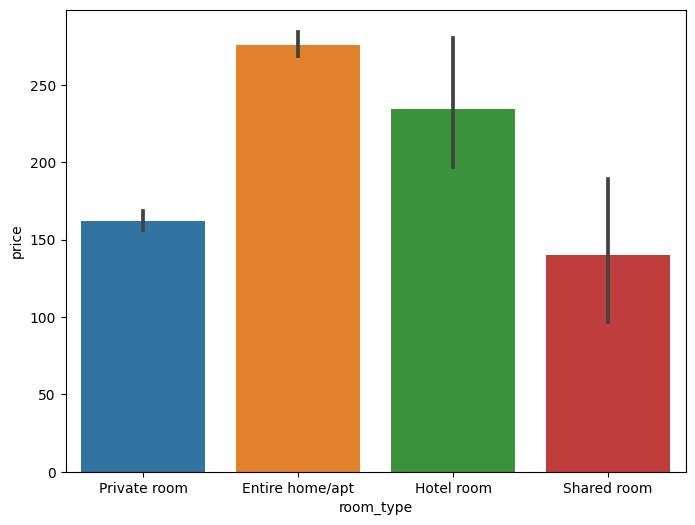

In [152]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price')

###### from graph I found Entire home/apt > hotel room > private room > shared room are expensive on price

In [153]:
x=df['neighbourhood'].str.split().str[1].astype(str)
x=x.str.lower()

<BarContainer object of 5208 artists>

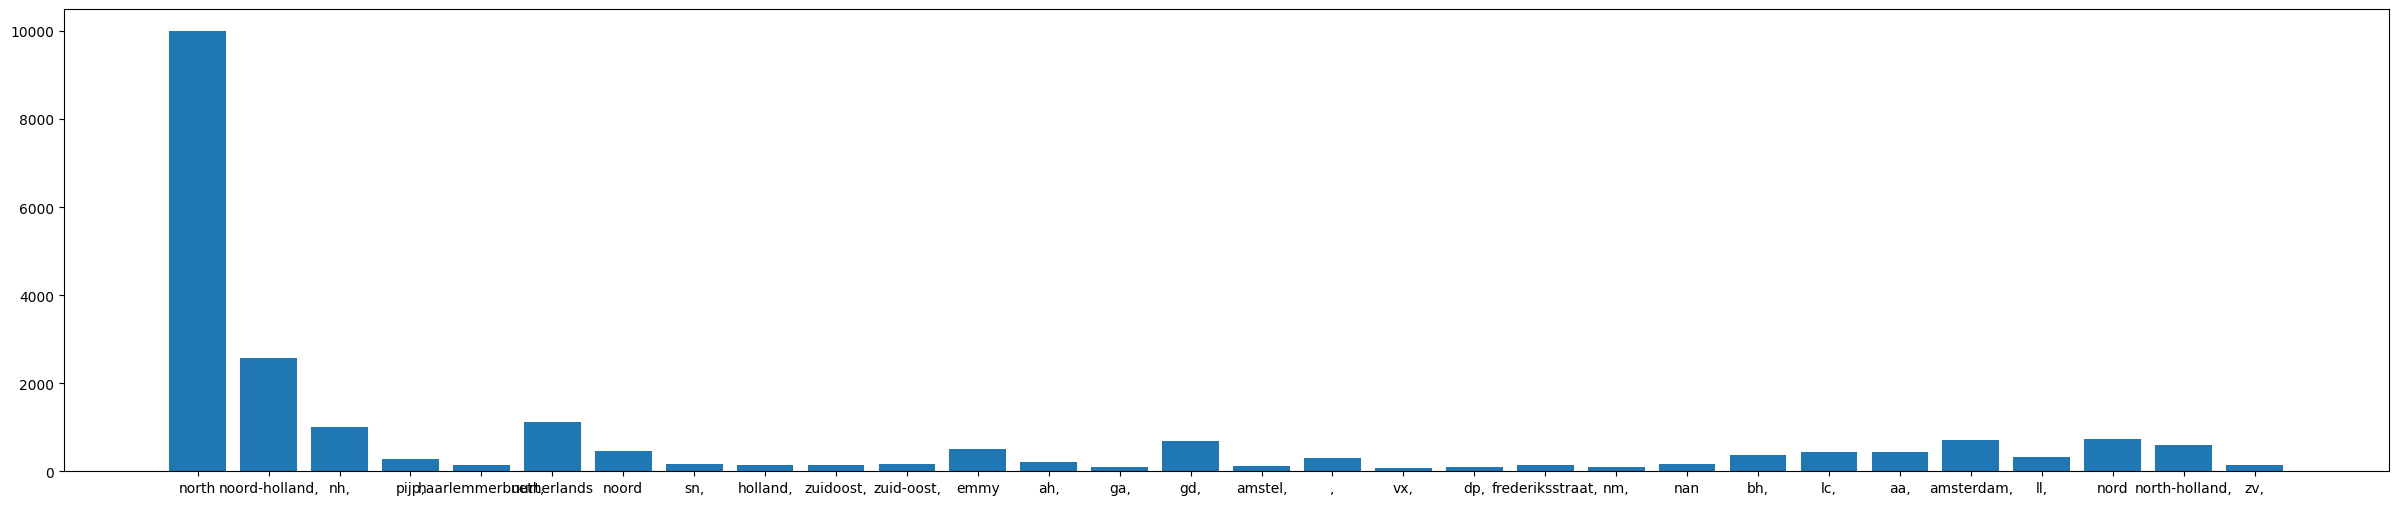

In [154]:
plt.figure(figsize=(30, 6))
plt.bar(x,df["price"])

###### from graph I found North > noord-holland > nethland > nd are expensive on price and other countries

<BarContainer object of 5208 artists>

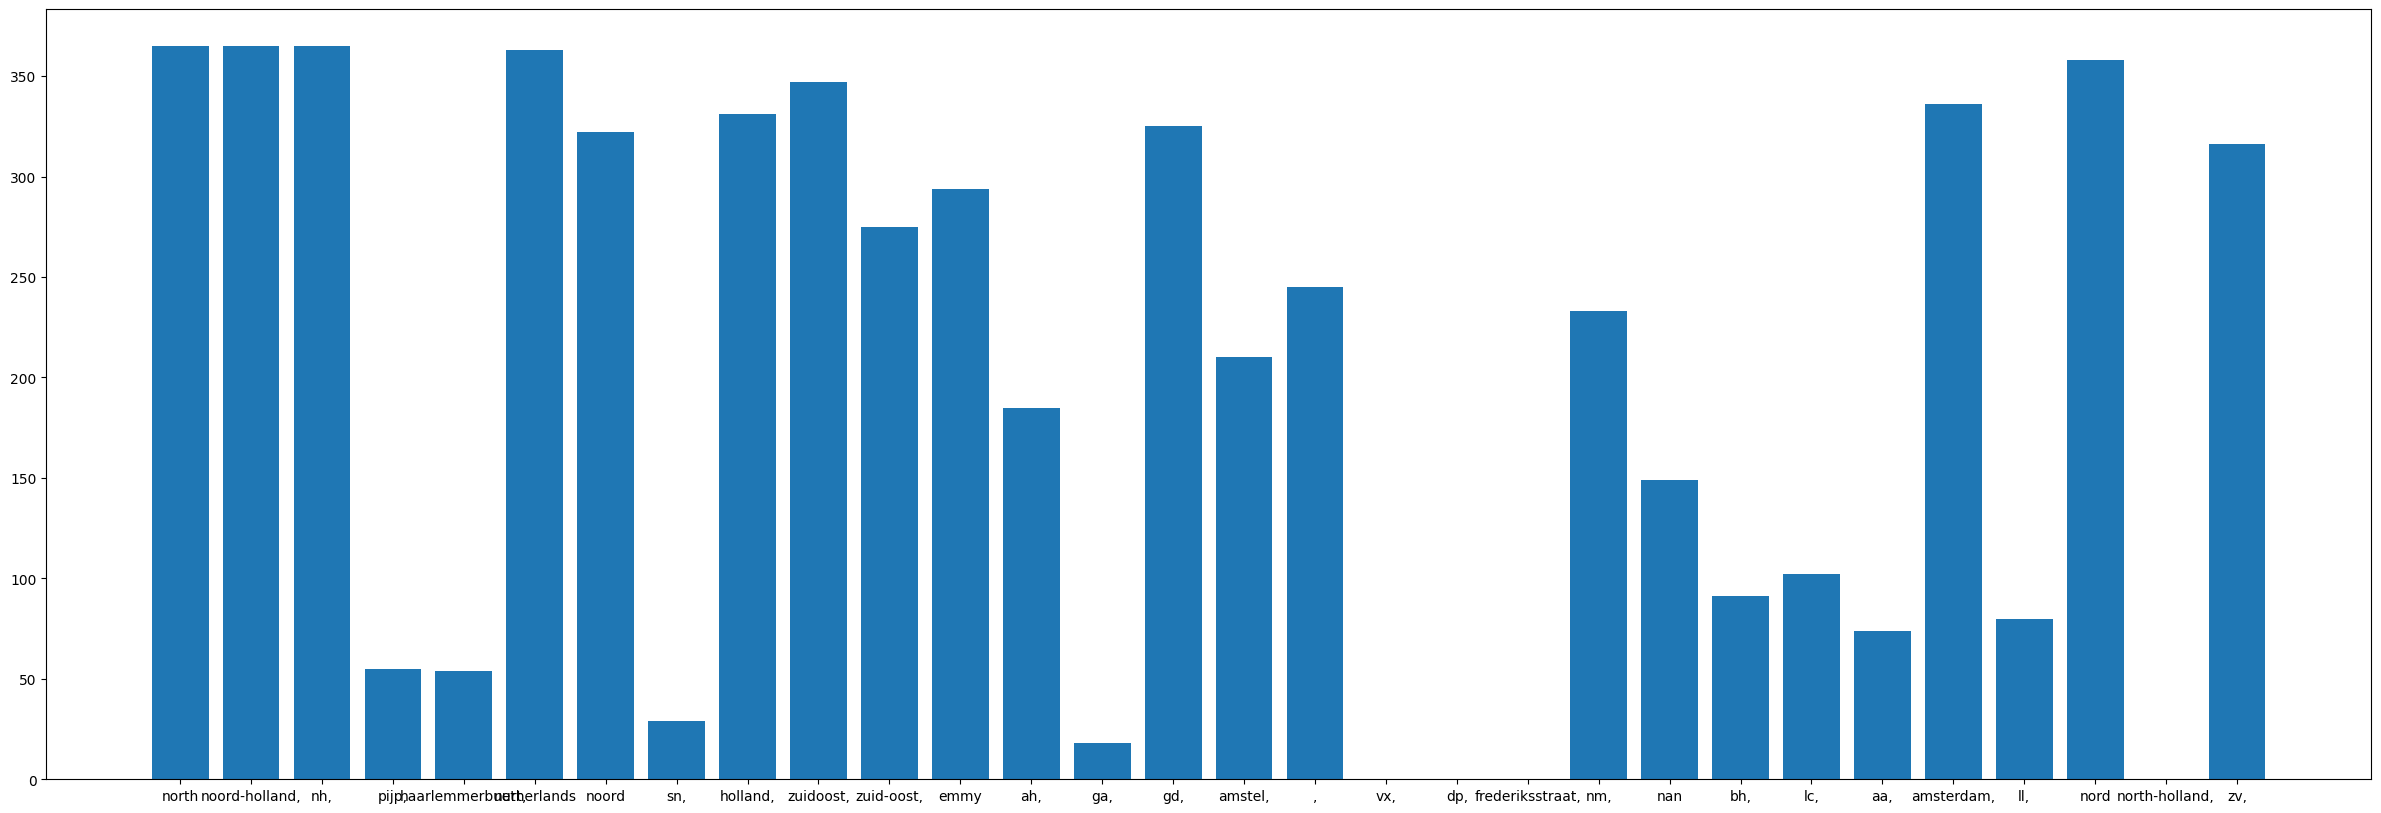

In [155]:
plt.figure(figsize=(30, 10))
plt.bar(x,df["availability_365"])

###### from graph I found the most crowded is vx > dp > frederikssraat > north-holland > ga > sn

<BarContainer object of 5208 artists>

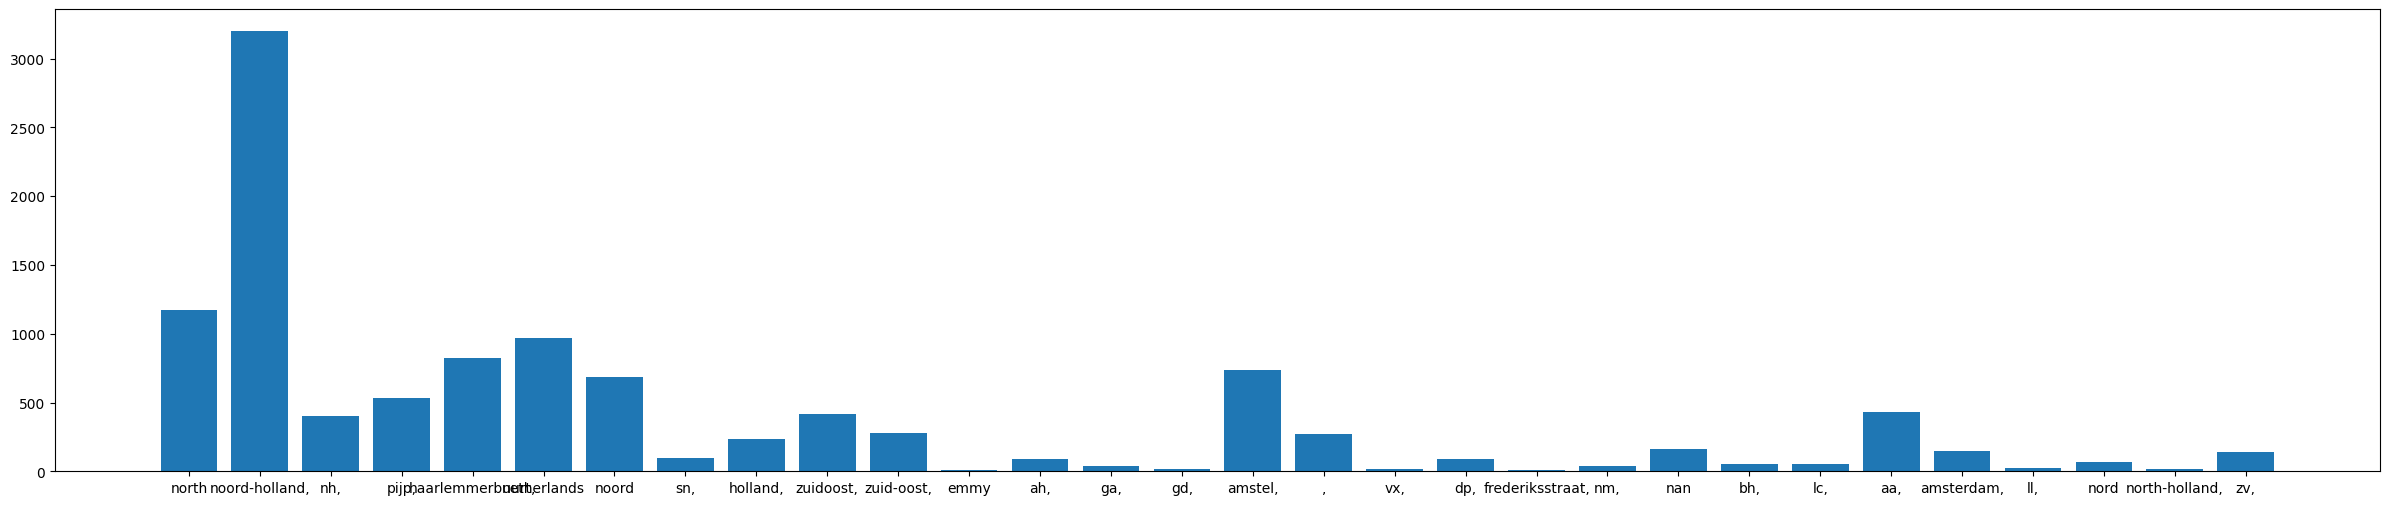

In [156]:
plt.figure(figsize=(30, 6))
plt.bar(x,df["number_of_reviews"])

###### from graph I found the most reviewed  is north-hollamd > north > nethlands 

###### I can found more information on data but it never-ending work